<a href="https://colab.research.google.com/github/Bimpeakinb/Bimpe-Portfolio/blob/main/Makeupanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Summary***

**Using a makeup dataset obtained via a makeup API, this project aims to provide insights for informed, data-driven business decisions.**

# ***Deliverables:***


* **Obtain data**
*   **Explore the data to understand the dataset**
*   **Clean the data**
*   **View Products Performance by ( Price, Rating distribution, Brand, Product Type)**
*   **Analyse the relationship between price and rating by category**
*   **Brand Insights(Most reviewed brands)**






# ***Install Depencecies***

In [1]:
!pip install requests
!pip install beautifulsoup4

# ***Import Library Packages***

**These libraries facilitated server interaction, dataset retrieval and parsing, computational tasks, data cleaning and preprocessing.**

In [2]:
import pandas as pd                         # for data analysis manipulation
import requests                             # for making http request to web servers
import matplotlib.pyplot as plt             # for visualization
import numpy as np                          # used for scientific computation
from bs4 import BeautifulSoup               # for data Scraping/ parsing
from google.colab import files              # import or export dataset to storage in desired format

# ***Dataset Scraping from makeup API***

In [3]:
API_URL = "https://makeup-api.herokuapp.com/api/v1/products.json"


def scrape_makeup_from_api():
    """
    Scrapes real makeup data from the Makeup Products API.
    Generates:
        - all_makeup_products.csv
        - top_rated_makeup.csv
        - low_rated_makeup.csv
    """
    print(f"Fetching makeup products from API: {API_URL}")

    try:
        response = requests.get(API_URL, timeout=10)
        response.raise_for_status()

        data = response.json()
        print(f"Fetched {len(data)} products.")

        # Convert to DataFrame
        df = pd.DataFrame(data)

        # Save all products
        df.to_csv("all_makeup_products.csv", index=False)
        print("Saved: all_makeup_products.csv ✔️")

        # Make rating numeric
        df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

        # Keep only products with rating
        rated_df = df.dropna(subset=["rating"])

        # Top 10 high-rated
        top_rated = rated_df.sort_values("rating", ascending=False).head(10)
        top_rated.to_csv("top_rated_makeup.csv", index=False)
        print("Saved: top_rated_makeup.csv ✔️")

        # Bottom 10 low-rated
        low_rated = rated_df.sort_values("rating", ascending=True).head(10)
        low_rated.to_csv("low_rated_makeup.csv", index=False)
        print("Saved: low_rated_makeup.csv ✔️")

        print("\n🎉 Makeup scraping complete!")
        return df, top_rated, low_rated

    except Exception as e:
        print(f"Error: {e}")


# Run the scraper
df_all, df_top, df_low = scrape_makeup_from_api()



Fetching makeup products from API: https://makeup-api.herokuapp.com/api/v1/products.json
Fetched 931 products.
Saved: all_makeup_products.csv ✔️
Saved: top_rated_makeup.csv ✔️
Saved: low_rated_makeup.csv ✔️

🎉 Makeup scraping complete!


# ***Data Exploration was carried out to examine the following.***
* **Inspect the number of rows and columns**

* **Determine the total size of the dataset**

* **Identify missing values, including their locations and counts**

* **Examine the data types of each column**

In [4]:
# View details of the dataset?
print(df_all.info())
print(f'Total Entrie: {df_all.shape[0]*df_all.shape[1]}')
print(f'Total Missing data: {df_all.isna().sum().sum()}')
print(f'Number of Rows in top dataset : {df_top.shape[0]}')
print(f'Number of Columns in top dataset: {df_top.shape[1]}')
print(f'Total Entries in top dataset: {df_top.shape[0]*df_top.shape[1]}')
print(f'Total Missing data in top dataset: {df_top.isna().sum().sum()}')
print(f'Number of Rows in low dataset: {df_low.shape[0]}')
print(f'Number of Columns in low dataset: {df_low.shape[1]}')
print(f'Total Entries in low dataset: {df_low.shape[0]*df_low.shape[1]}')
print(f'Total Missing data in low dataset: {df_low.isna().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  931 non-null    int64  
 1   brand               919 non-null    object 
 2   name                931 non-null    object 
 3   price               917 non-null    object 
 4   price_sign          368 non-null    object 
 5   currency            368 non-null    object 
 6   image_link          931 non-null    object 
 7   product_link        931 non-null    object 
 8   website_link        931 non-null    object 
 9   description         930 non-null    object 
 10  rating              340 non-null    float64
 11  category            517 non-null    object 
 12  product_type        931 non-null    object 
 13  tag_list            931 non-null    object 
 14  created_at          931 non-null    object 
 15  updated_at          931 non-null    object 
 16  product_

In [5]:
# Are there missing entries in the Top dataset and what column?
# Note: Top refers to high rating dataset.
df_top.isna().sum()

,0
id,0
brand,0
name,0
price,0
price_sign,10
currency,10
image_link,0
product_link,0
website_link,0
description,0


In [6]:
# Details of missing entries in the Low dataset
df_low.isna().sum()

,0
id,0
brand,1
name,0
price,0
price_sign,10
currency,10
image_link,0
product_link,0
website_link,0
description,0


In [7]:
#Details of the top three highly rated makeup Product
df_top.head(3)

,id,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
896,35,covergirl,CoverGirl Lashblast Volume Blasting Waterproof...,9.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/527f52...,https://well.ca/products/covergirl-lashblast-v...,https://well.ca,"Get a blast of lush, volumized lashes! LashBla...",5.0,None,mascara,[],2016-10-01T18:11:25.863Z,2017-12-23T20:31:52.669Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
895,36,wet n wild,Wet n Wild Mega Protein Mascara,3.49,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/8b5c28...,https://well.ca/products/wet-n-wild-mega-prote...,https://well.ca,Wet n Wild Mega Protein Mascara is a nourishin...,5.0,None,mascara,[],2016-10-01T18:11:28.742Z,2017-12-23T20:50:52.703Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
528,449,covergirl,CoverGirl Cheekers Blush,6.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/1d1668...,https://well.ca/products/covergirl-cheekers-bl...,https://well.ca,"Blush's basic rules—it has to be easy, and it ...",5.0,powder,blush,[],2016-10-01T18:35:02.504Z,2017-12-23T21:08:44.000Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,[]


In [8]:
# Details of the first two lowest ranking product
df_low.head(2)


,id,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
812,131,essie,Essie Nail Colour Cashmere Matte Collection,10.0,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/5a8e81...,https://well.ca/products/essie-nail-colour-cas...,https://well.ca,With a satin-matte texture and a subtle but sp...,1.5,None,nail_polish,[],2016-10-01T18:26:27.827Z,2017-12-23T20:51:05.428Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#a57f7b', 'colour_name': 'Comf..."
552,420,nyx,NYX Rouge Cream Blush,9.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/7e559a...,https://well.ca/products/nyx-rouge-cream-blush...,https://well.ca,"NYX Rough Cream Blush is a long-lasting, sheer...",2.0,cream,blush,[],2016-10-01T18:34:24.983Z,2017-12-23T21:08:41.488Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#E4878D', 'colour_name': 'Boho..."


# ***Data cleaning procedures were carried out to address some of the identified issues in the dataset.***
* **Fix inconsistencies in the data**

* **Fill in missing values where appropriate**

* **Remove entities that are not relevant to the analysis**

In [4]:
df_all['price'] = pd.to_numeric(df_all['price'], errors='coerce')   # Fix inconsistency with price column
df_all['price'] = df_all['price'].fillna(df_all['price'].mean())    # Fill missing data
df_all['price'] =df_all['price'].astype(int)                        # Convert price to integer
df_all['price'] = df_all['price'].round(0)                          # Round price to two decimal places
df_all["brand"] = df_all["brand"].fillna("unknown")                 # Fill missing data
df_all["category"] = df_all["category"].fillna("unknown")           # Fill missing data
df_all = df_all.drop('price_sign', axis=1)                          # Drop price_sign column because is not needed
df_all = df_all.drop('currency', axis=1)                            # Drop currency column not needed for the analysis

In [12]:
df_all.head(1)

,id,brand,name,price,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
0,1048,colourpop,Lippie Pencil,5,https://cdn.shopify.com/s/files/1/1338/0845/co...,https://colourpop.com/collections/lippie-pencil,https://colourpop.com,Lippie Pencil A long-wearing and high-intensit...,NaN,pencil,lip_liner,"[cruelty free, Vegan]",2018-07-08T23:45:08.056Z,2018-07-09T00:53:23.301Z,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#B28378', 'colour_name': 'BFF ..."


# ***Visualization***

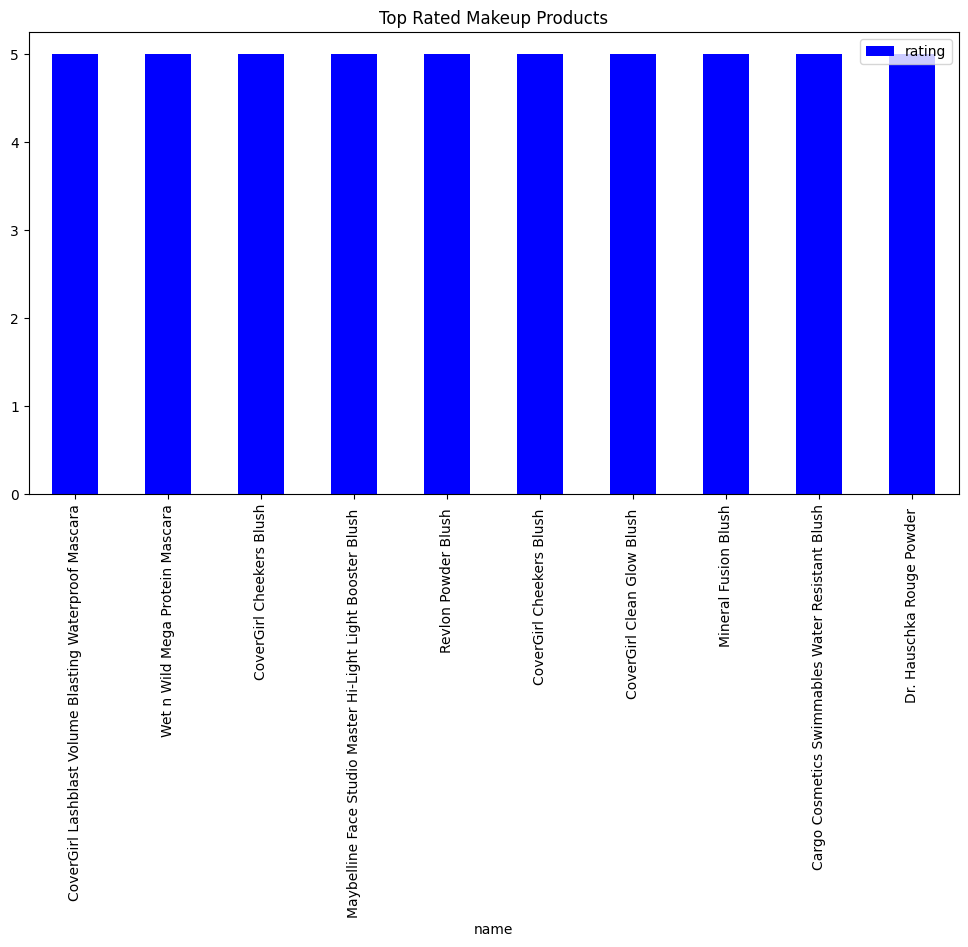

In [5]:
df_top.plot(kind="bar", x="name", y="rating", figsize=(12,6), color="blue")
plt.title("Top Rated Makeup Products")
plt.show()

## ***Export the Data into Excel File for further analysis***

**For refrence and documentation**

In [47]:
from google.colab import drive
drive.mount('/content/drive')
df_all.to_excel('/content/drive/MyDrive/Makeup_Rating_dataset.xlsx', index=False)
print('Excel file successfully downloaded')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Excel file successfully downloaded


# **Analysis perfomed to generate meaningful data points for interpretation.**

In [6]:
#TOP RATED PRODUCTS
top_rated_makeup_Product = df_top.sort_values(by='rating', ascending=False)


In [7]:
# LOWEST RATED PRODUCTS
low_rated_makeup_Product = df_low.sort_values(by='rating', ascending=True)

In [8]:
# OVERALL AVERAGE RATING BY BRAND
import plotly.express as px
average_rating_by_brand = df_all.groupby('brand')['rating'].mean().reset_index()
fig = px.bar(
    average_rating_by_brand.sort_values("rating", ascending=False).head(20),
    x="brand",
    y="rating",
    title=" FIRST 20 Brands by Average Rating"
)
fig.show()

In [13]:
# VIEW FIRST 30 LOW RATED BRANDS
average_rating_by_brand = df_low.groupby('brand')['rating'].mean().reset_index()

fig = px.bar(
    average_rating_by_brand.sort_values("rating", ascending=False).head(15),
    x="brand",
    y="rating",
    title="Low Rated Brands by Average Rating",
    color_discrete_sequence=["#1f77b4"]  # Set bar color here
)

fig.show()


***Question: Do Customers believe expensive products are better?***

***Observation: It appears that price does not influence ratings, since expensive products received high and low ratings similarly to cheap products.***

In [21]:
# WHAT IS THE RELATIONSHIP BETWEEN PRICE AND RATING
fig = px.scatter(
    df_all,
    x='price',
    y='rating',
    title='Price vs Rating',
    color='brand',
    opacity=0.7,
    labels={'price': 'Price ($)', 'rating': 'Rating'}
)
fig.show()

***investigate more on how price relates to rating for each category to check for different outcomes.***

In [30]:
fig = px.scatter(
    df_all,
    x='price',
    y='rating',
    color='brand',
    opacity=0.7,
    facet_col='product_type',   # Facet by product type
    facet_col_wrap=3,           # Wrap facets every 3 columns
    title='Price vs Rating by Product Type',
    labels={'price': 'Price ($)', 'rating': 'Rating', 'product_type': 'Product Type'}
)

# Optional: adjust layout for better readability
fig.update_layout(
    height=600 + 150 * len(df_all['product_type'].unique())//3,
    width=1200
)

fig.show()


**Question: How are the rating distributed?**

**Observation : There are more high rated poducts compared to low rated ones.**

In [14]:
rating_counts = df_all["rating"].value_counts().sort_index().reset_index()
rating_counts.columns = ["rating", "count"]

fig = px.bar(
    rating_counts,
    x="rating",
    y="count",
    title="Rating Distribution (Count of Each Rating)",
    color_discrete_sequence=["#e67e22"]  # orange
)

fig.show()

# ***An overview of which brand dominate or underperform***

 **Observation:**

***Maybelline, Physicians Formula, Covergirl,l'oreal and Revlon are the top 5 dominating brand while.***

***Dalish, Misa, Mistura, Piggy Paints and Sinful colors were the bottom 5 underperforming products at the time this analysis was performed.***

In [15]:
brand_rating_counts = df_all.groupby(['brand', 'rating']).size().reset_index(name='count')

fig = px.bar(
    brand_rating_counts,
    x='brand',
    y='count',
    color='rating',
    title="Rating Distribution by Brand",
    color_continuous_scale='rdbu'
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

***Insights into how different product types behave***

In [16]:
type_rating_counts = df_all.groupby(['product_type', 'rating']).size().reset_index(name='count')

fig = px.bar(
    type_rating_counts,
    x='product_type',
    y='count',
    color='rating',
    title="Rating Distribution by Product Type",
    color_continuous_scale='tealgrn'
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

***Qustion: How many low and high ratings were recorded in this dataset?***

***Observation: There are only 26 low ratings compared to over 900 high ratings.***

In [17]:
df_all['rating_category'] = df_all['rating'].apply(lambda x: 'RatedLow (<=3)' if x <= 3 else 'Rated High (>=4)')

rating_category_counts = df_all['rating_category'].value_counts().reset_index()
rating_category_counts.columns = ['Rating Category', 'Count']

fig = px.bar(
    rating_category_counts,
    x='Rating Category',
    y='Count',
    color='Rating Category',
    title="Numbers of Low vs High Reviews",
    color_discrete_map={"Low (<=3)":"#e67e22","High (>=4)":"#1f77b4"}
)
fig.show()

# ***Keyword Extarction from customers Reviews***

***Qustion: What are customers complaining about or prasing in the products?***

***Observation: Customers mostly talk about how oily or natural the products are, the ingredients and formula, effects on skin, color, and so on***.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)
matrix = vectorizer.fit_transform(df_all['description'].dropna())

keywords = pd.DataFrame({
    'keyword': vectorizer.get_feature_names_out(),
    'count': matrix.sum(axis=0).A1
}).sort_values('count', ascending=False)

fig = px.bar(
    keywords,
    x='keyword',
    y='count',
    title='Most Common Keywords in customers review',
    color='count'
)
fig.show()
